In [2]:
import cv2
from mcore.moonlight import MoonLight 
import matplotlib.pyplot as plt

In [3]:
model = MoonLight()

[2023/04/21 11:53:59] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/home/satish/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/home/satish/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_pa

In [4]:
img = cv2.imread('samples/test5.png')

frame , numberplate = model.detect(img)


0: 640x288 1 licence, 2995.4ms
Speed: 5.5ms preprocess, 2995.4ms inference, 11.8ms postprocess per image at shape (1, 3, 640, 640)


bounding box:  tensor([ 198, 1235,  407, 1313], dtype=torch.int32)
[2023/04/21 11:54:20] ppocr WARNING: Since the angle classifier is not initialized, the angle classifier will not be uesd during the forward process
[2023/04/21 11:54:20] ppocr DEBUG: dt_boxes num : 1, elapse : 0.20510458946228027
[2023/04/21 11:54:21] ppocr DEBUG: rec_res num  : 1, elapse : 0.8536019325256348


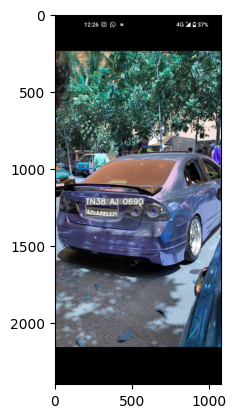

In [5]:
plt.imshow(frame)

In [6]:
print(numberplate)

['TN38 AJ 0690']
